# Fractal Art

In [1]:
from numba import jit
import numpy as np

In [2]:
@jit
def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

In [3]:
@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

In [4]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline
 

def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=256):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,origin='lower') 
    
    save_image(fig)

In [50]:
image_counter = 30

def save_image(fig):
    global image_counter
    filename = "mandelbrodt_%d.png" % image_counter
    image_counter += 1
    fig.savefig(filename)

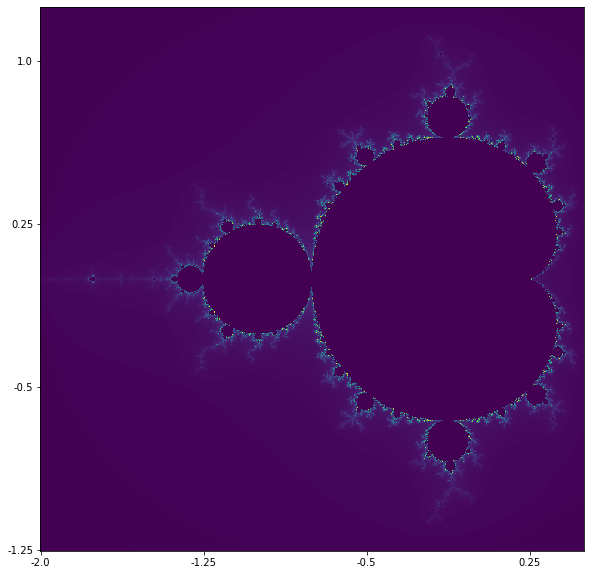

In [6]:
mandelbrot_image(-5.3,7.5,-1.25,4.25)

In [7]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=80,cmap='jet'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 
    
    save_image(fig)

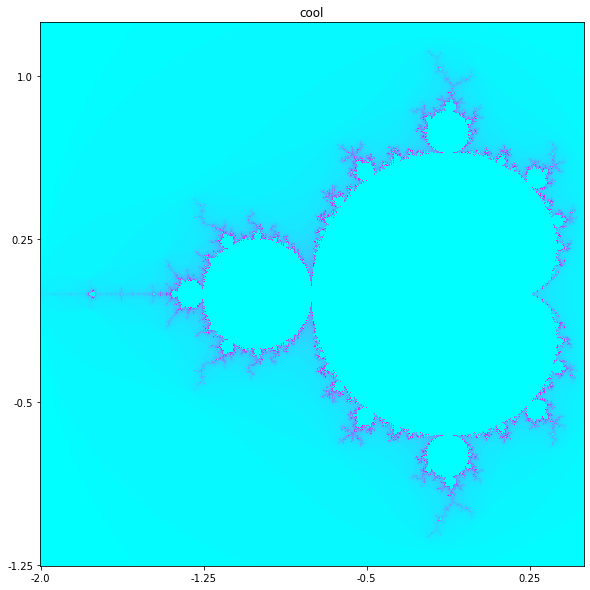

In [10]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,cmap='cool')

In [ ]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=100,height=100,\
                     maxiter=80,cmap='jet',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm)  
    
    save_image(fig)